<a href="https://colab.research.google.com/github/FelipeTavares7/data_science_projects/blob/main/Projeto_Construindo_um_Modelo_de_Regress%C3%A3o_para_Estrat%C3%A9gias_de_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

**Projeto: Construindo um Modelo de Regressão para Estratégias de Marketing**

*   **Objetivo:**
> Otimizar investimentos em publicidade online (YouTube, Facebook, newspapper).
Prospectar leads e medir o desempenho dos investimentos.

*   **Registro de Dados:**
> Detalhada contabilidade de gastos com publicidade e retornos de vendas.

*   **Necessidades:**
> 1.   Análise especializada para identificar fatores impactantes na geração de leads;
> 2.   Desenvolvimento de modelo de regressão para estimar retorno de vendas.

*   **Propósito do Notebook:**
> Orientar desde a compreensão inicial dos dados até a implementação e avaliação do modelo.
> Fornecer insights práticos para embasar decisões estratégicas no marketing digital.


Espero que este notebook sirva como ferramenta essencial para a tomada de decisões informadas e eficazes no âmbito do marketing digital.

In [ ]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings

# Data Understanding

In [ ]:
# Carregando os Dados
df = pd.read_csv('MKT.csv')

## Análises Descritivas:

In [ ]:
# Visualizando o Dataframe (5 primeiras linhas e as 5 últimas)
display(df)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60




---


- O Dataframe possui 171 linhas e 4 colunas. Sendo as colunas:
  - `'youtube'`, `'facebook'` e `'newspaper'` = plataformas digitais onde foram feitos os investimentos em marketing;
  - `'sales'` = valor de retorno em vendas após investimento. **Variável target**.
- Os nomes das colunas seguem um padrão, estando em minúsculas e sem espaços. Não há necessidade de realizar tratamentos adicionais nesse aspecto.
- Os valores presentes nas colunas apresentam duas casas decimais.


---



In [ ]:
# Informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB




---



- Não há dados nulos presentes no conjunto de dados.
- Todas os dados são do tipo numérico `float`.


---



In [ ]:
# Estatísticas descritivas do Dataframe
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000




---

- Todos os valores de **Desvio Padrão(std)** estão abaixo de **Média(mean)** indicando que os dados estão relativamente homogêneos.


---



In [ ]:
fig = px.box(df,
             x='sales',
             title='Visualização gráfica das estatísticas da Variável Target (''sales'')')
fig.update_traces(line_color='blue')

## Análises Exploratórias:

In [ ]:
# Verificando correlações entre as variáveis
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


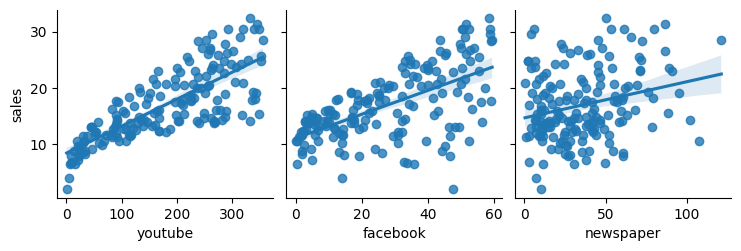

In [ ]:
# Verificando correlações entre a variável target e as demais, de forma gráfica
sns.pairplot(df, x_vars=('youtube', 'facebook', 'newspaper'), y_vars='sales', kind='reg');



---

- Correlações do investimento, por plataforma, com o retorno das vendas ('`sales`'):
 - **Alta** com `youtube`;
 - **Média** com `facebook`;
 - **Baixa** com `newspaper`.


---



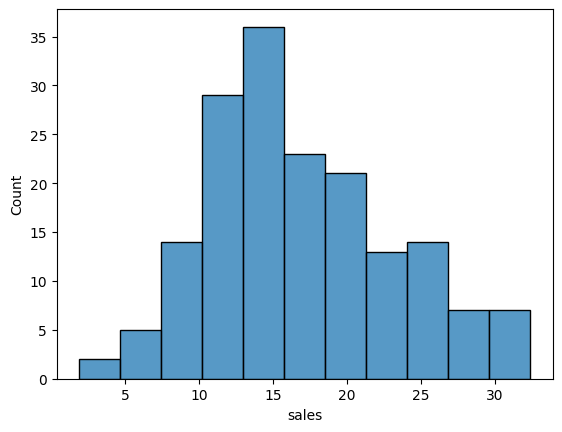

In [ ]:
# Visualizando o histograma de 'sales'
sns.histplot(df['sales']);



---

- Com o histogrma relativamente simétrico obtemos as seguintes informações:
  - Não há grandes outliers;
  - As vendas estão consitentes, estáveis.

---



# Modeling

In [ ]:
# Separando as Features(X) e o Label(y) do DF
# Features
X = df[['youtube', 'facebook', 'newspaper']]

# Label
y = df[['sales']]

In [ ]:
# Dividindo o dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [ ]:
# Verificando os tamanhos dos conjuntos separados do DF
print('X de Treino: ', X_train.shape)
print('X de Teste: ', X_test.shape)
print('y de Treino: ', y_train.shape)
print('y de Teste: ', y_test.shape)

X de Treino:  (119, 3)
X de Teste:  (52, 3)
y de Treino:  (119, 1)
y de Teste:  (52, 1)


In [ ]:
# Criando o modelo de regressão linear
model_RL = LinearRegression(fit_intercept=True)

In [ ]:
# Treinando o modelo
model_RL.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Fazendo previsões
y_pred = model_RL.predict(X_test)

In [ ]:
# Métrica de r2_score
r = r2_score(y_test, y_pred)
print("r_quadrado:", r)

r_quadrado: 0.882423505618885


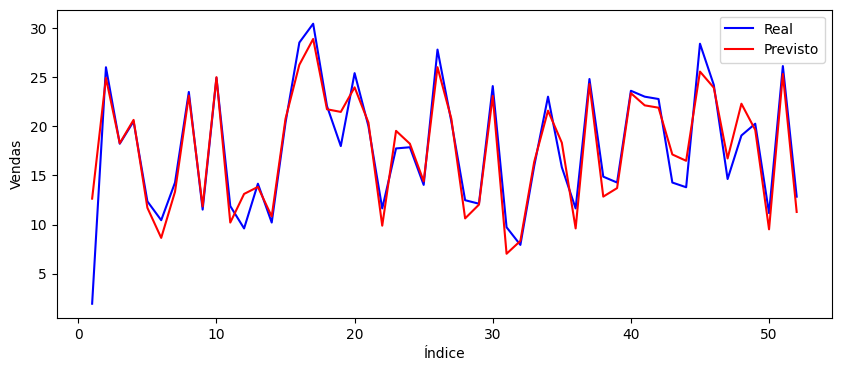

In [ ]:
# Visualizando de forma gráfica os valores Reais e valores de Previsão
c = [i for i in range(1, len(y_test) + 1)]
fig = plt.figure(figsize=(10,4))
plt.plot(c, y_test, color='blue', label='Real')
plt.plot(c, y_pred, color = 'red', label='Previsto')
plt.xlabel('Índice')
plt.ylabel('Vendas')
plt.legend();

# Previsões com dados do usuário:

In [ ]:
# Fazendo previsões para novos dados fornecidos pelo usuário
print('Digite o valores pretendidos a investir em cada plataforma.')
investimento_youtube = float(input('Valor no Youtube: R$ '))
investimento_facebook = float(input('Valor no Facebook: R$ '))
investimento_newspaper = float(input('Valor em newspaper: R$ '))
dados_usuario = np.array([[investimento_youtube, investimento_facebook, investimento_newspaper]])
previsao = model_RL.predict(dados_usuario)

# Ignorando os avisos de 'Warnings' da impressão de previsão (apenas estética)
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

# Imprimindo a previsão
print('Previsão de Vendas: R$', np.round(previsao[0][0], 2));

Digite o valores pretendidos a investir em cada plataforma.
Valor no Youtube: R$ 55
Valor no Facebook: R$ 80
Valor em newspaper: R$ 20
Previsão de Vendas: R$ 21.2
